Write some code that simulates the projection of a 3D cube under perspective projection. The eight corners of the cube are:

[0,0,0], [1,0,0], [1,1,0], [0,1,0], [0,0,1], [1,0,1], [1,1,1], [0,1,1]

In [24]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt

In [25]:
# 3D unit cube (homogeneous coordinates)
cube = np.array(
    [
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1],
    ]
)

In [26]:
# rotation in radians
Rx = np.radians(30)
Ry = np.radians(30)
Rz = np.radians(0)

# translation
Tx = 0
Ty = 0
Tz = 100

# camera parameters
f = 1 # focal length
Cx = 0 # camera offset
Cy = 0 # camera offset

Construct the intrinsic matrix

In [27]:
K = np.array([[f, 0, Cx], [0, f, Cy], [0, 0, 1]])

Construct the extrinsic matrix

In [28]:

# rotation matrices
RMx = np.array([[1, 0, 0], [0, cos(Rx), -sin(Rx)], [0, sin(Rx), cos(Rx)]])
RMy = np.array([[cos(Ry), 0, sin(Ry)], [0, 1, 0], [-sin(Ry), 0, cos(Ry)]])
RMz = np.array([[cos(Rz), -sin(Rz), 0], [sin(Rz), cos(Rz), 0], [0, 0, 1]])
RM = RMx @ RMy @ RMz

# translation
M = np.zeros((3, 4))
M[0,3] = Tx
M[1,3] = Ty
M[2,3] = Tz
M[:3,:3] = RM



In [29]:
p = K @ M @ np.transpose(cube)

Why `np.transpose(cube)`:
- Matrix Dimensions:
    - K matrix (3x3)
    - M matrix (3x4)
    - cube matrix (8x4)
    
- Why transpose:
    To align the dimensions correctly for matrix multiplication, we need to transpose the cube matrix to 4x8, and each point will be treaded as a column vector.

In [30]:
# Convert to non-homogeneous coordinates
x = p[0, :] / p[2, :]
y = p[1, :] / p[2, :]

The final result p will be a matrix with dimensions 3 x 8:
- 3 rows: $x_s$, $y_s$, $s$ 
- 8 columns: These correspond to the 8 points of the cube.

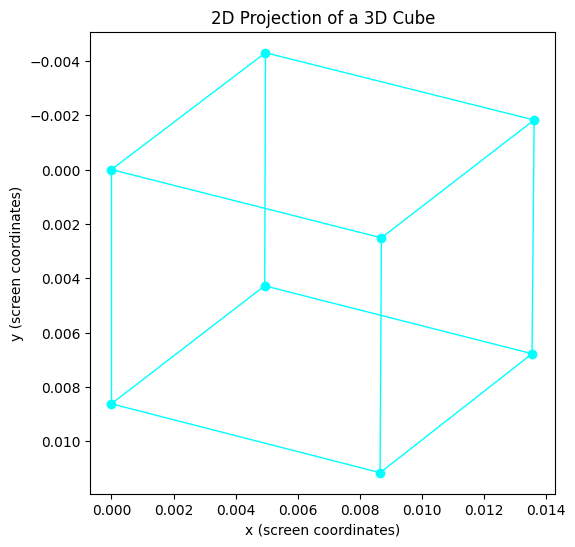

In [31]:
# Edges of the cube
edges = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 0),  # bottom face
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 4),  # top face
    (0, 4),
    (1, 5),
    (2, 6),
    (3, 7),  # vertical edges
]

# Plotting the cube
plt.figure(figsize=(6, 6))
for start, end in edges:
    plt.plot([x[start], x[end]], [y[start], y[end]], color="cyan", linewidth=1)

# Plot points as well
plt.scatter(x, y, color="cyan")

# Set plot labels and title
plt.xlabel("x (screen coordinates)")
plt.ylabel("y (screen coordinates)")
plt.title("2D Projection of a 3D Cube")

# Invert y-axis to match the image style
plt.gca().invert_yaxis()

# Show the plot
plt.show()